In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

In [ ]:
data=pd.read_csv(r'/content/heart.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


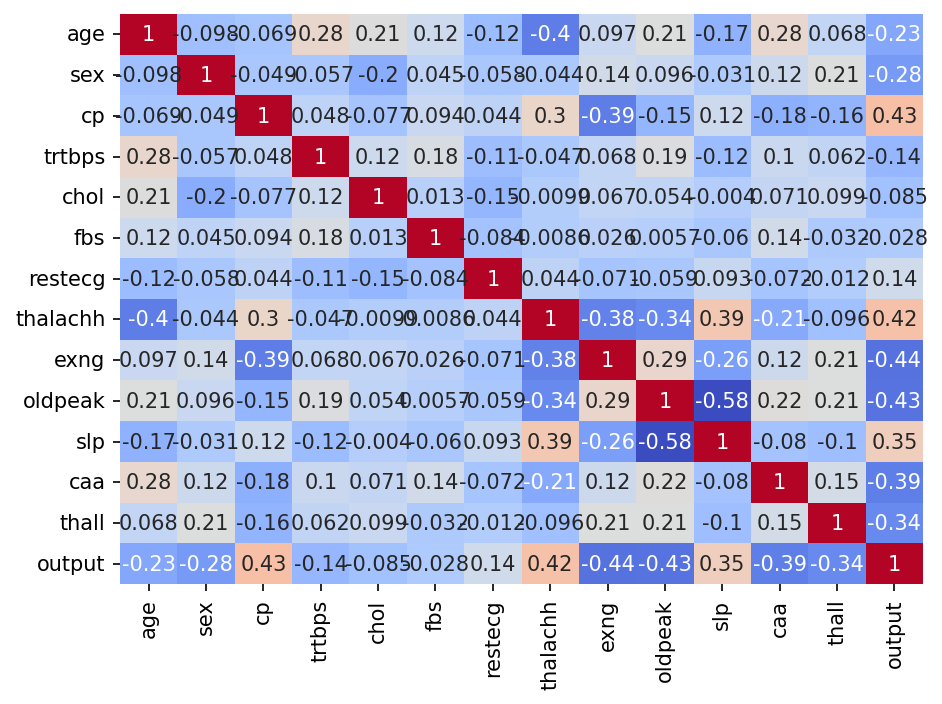

In [ ]:
plt.figure(dpi=150)
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,cbar=False)
plt.tight_layout()

In [ ]:
# حذف دو ستون
# one hot restecg 
# one hot with delete

<Axes: xlabel='sex', ylabel='count'>

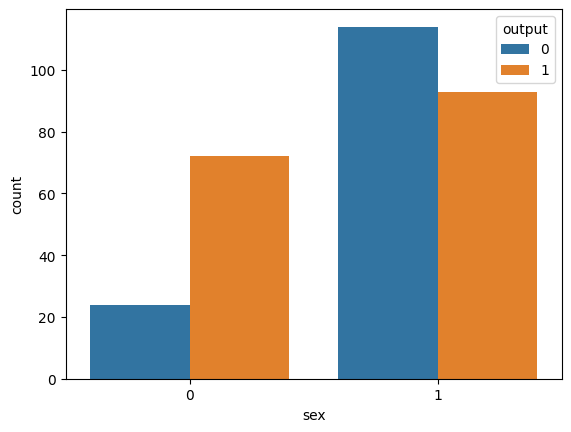

In [ ]:
sns.countplot(data=data,x='sex',hue='output')

<Axes: xlabel='restecg', ylabel='count'>

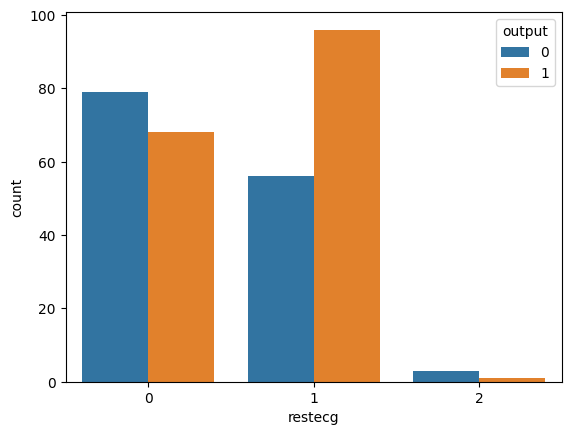

In [ ]:
sns.countplot(data=data,x='restecg',hue='output')

<Axes: xlabel='cp', ylabel='count'>

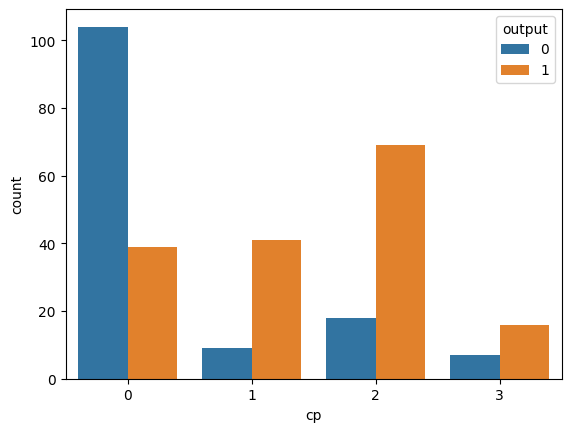

In [ ]:
sns.countplot(data=data,x='cp',hue='output')

In [ ]:
data.groupby(['cp','output'])['age'].count()

cp  output
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
Name: age, dtype: int64

<Axes: xlabel='caa', ylabel='count'>

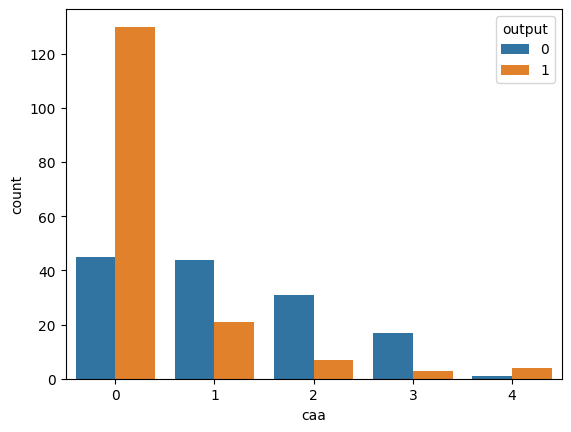

In [ ]:
sns.countplot(data=data,x='caa',hue='output')

In [ ]:
data.pop('fbs')
data.pop('chol')

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

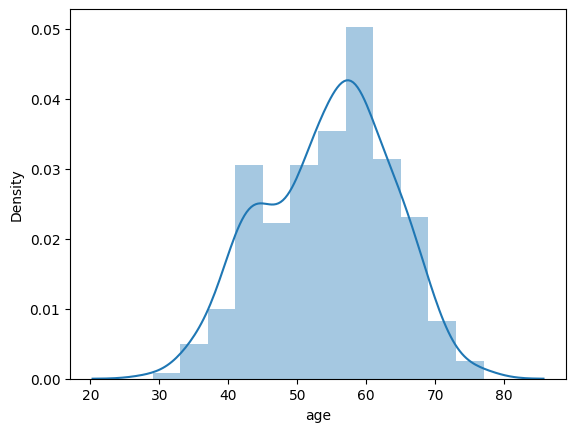

In [ ]:
sns.distplot(data['age'])

<Axes: xlabel='thalachh', ylabel='Density'>

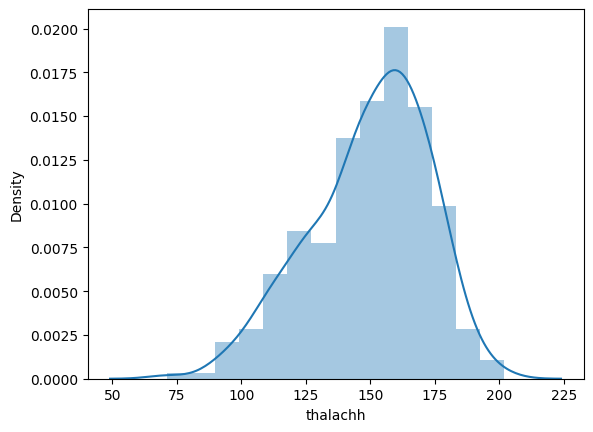

In [ ]:
sns.distplot(data['thalachh'])

<Axes: xlabel='trtbps', ylabel='Density'>

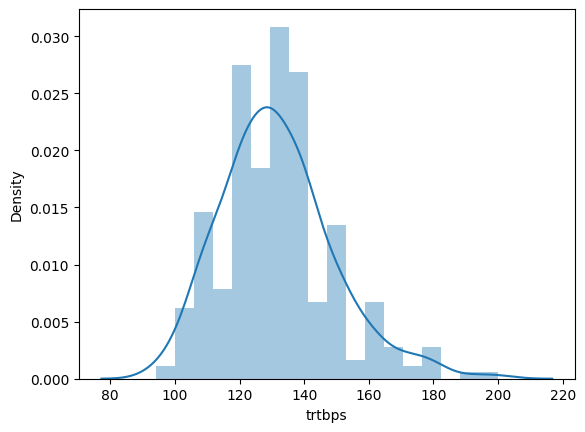

In [ ]:
sns.distplot(data['trtbps'])

<Axes: >

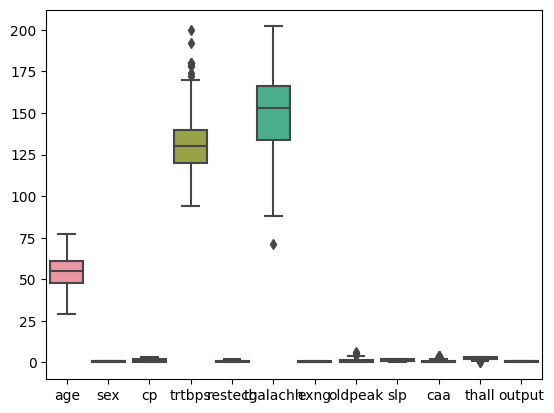

In [ ]:
sns.boxplot(data)

In [ ]:
data=data[data['trtbps']<180]

In [ ]:
data=data[data['thalachh']>80]

In [ ]:
one_hot = pd.get_dummies(data['restecg'])

In [ ]:
one_hot

,0,1,2
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [ ]:
data.pop("restecg")
data=data.join(one_hot)

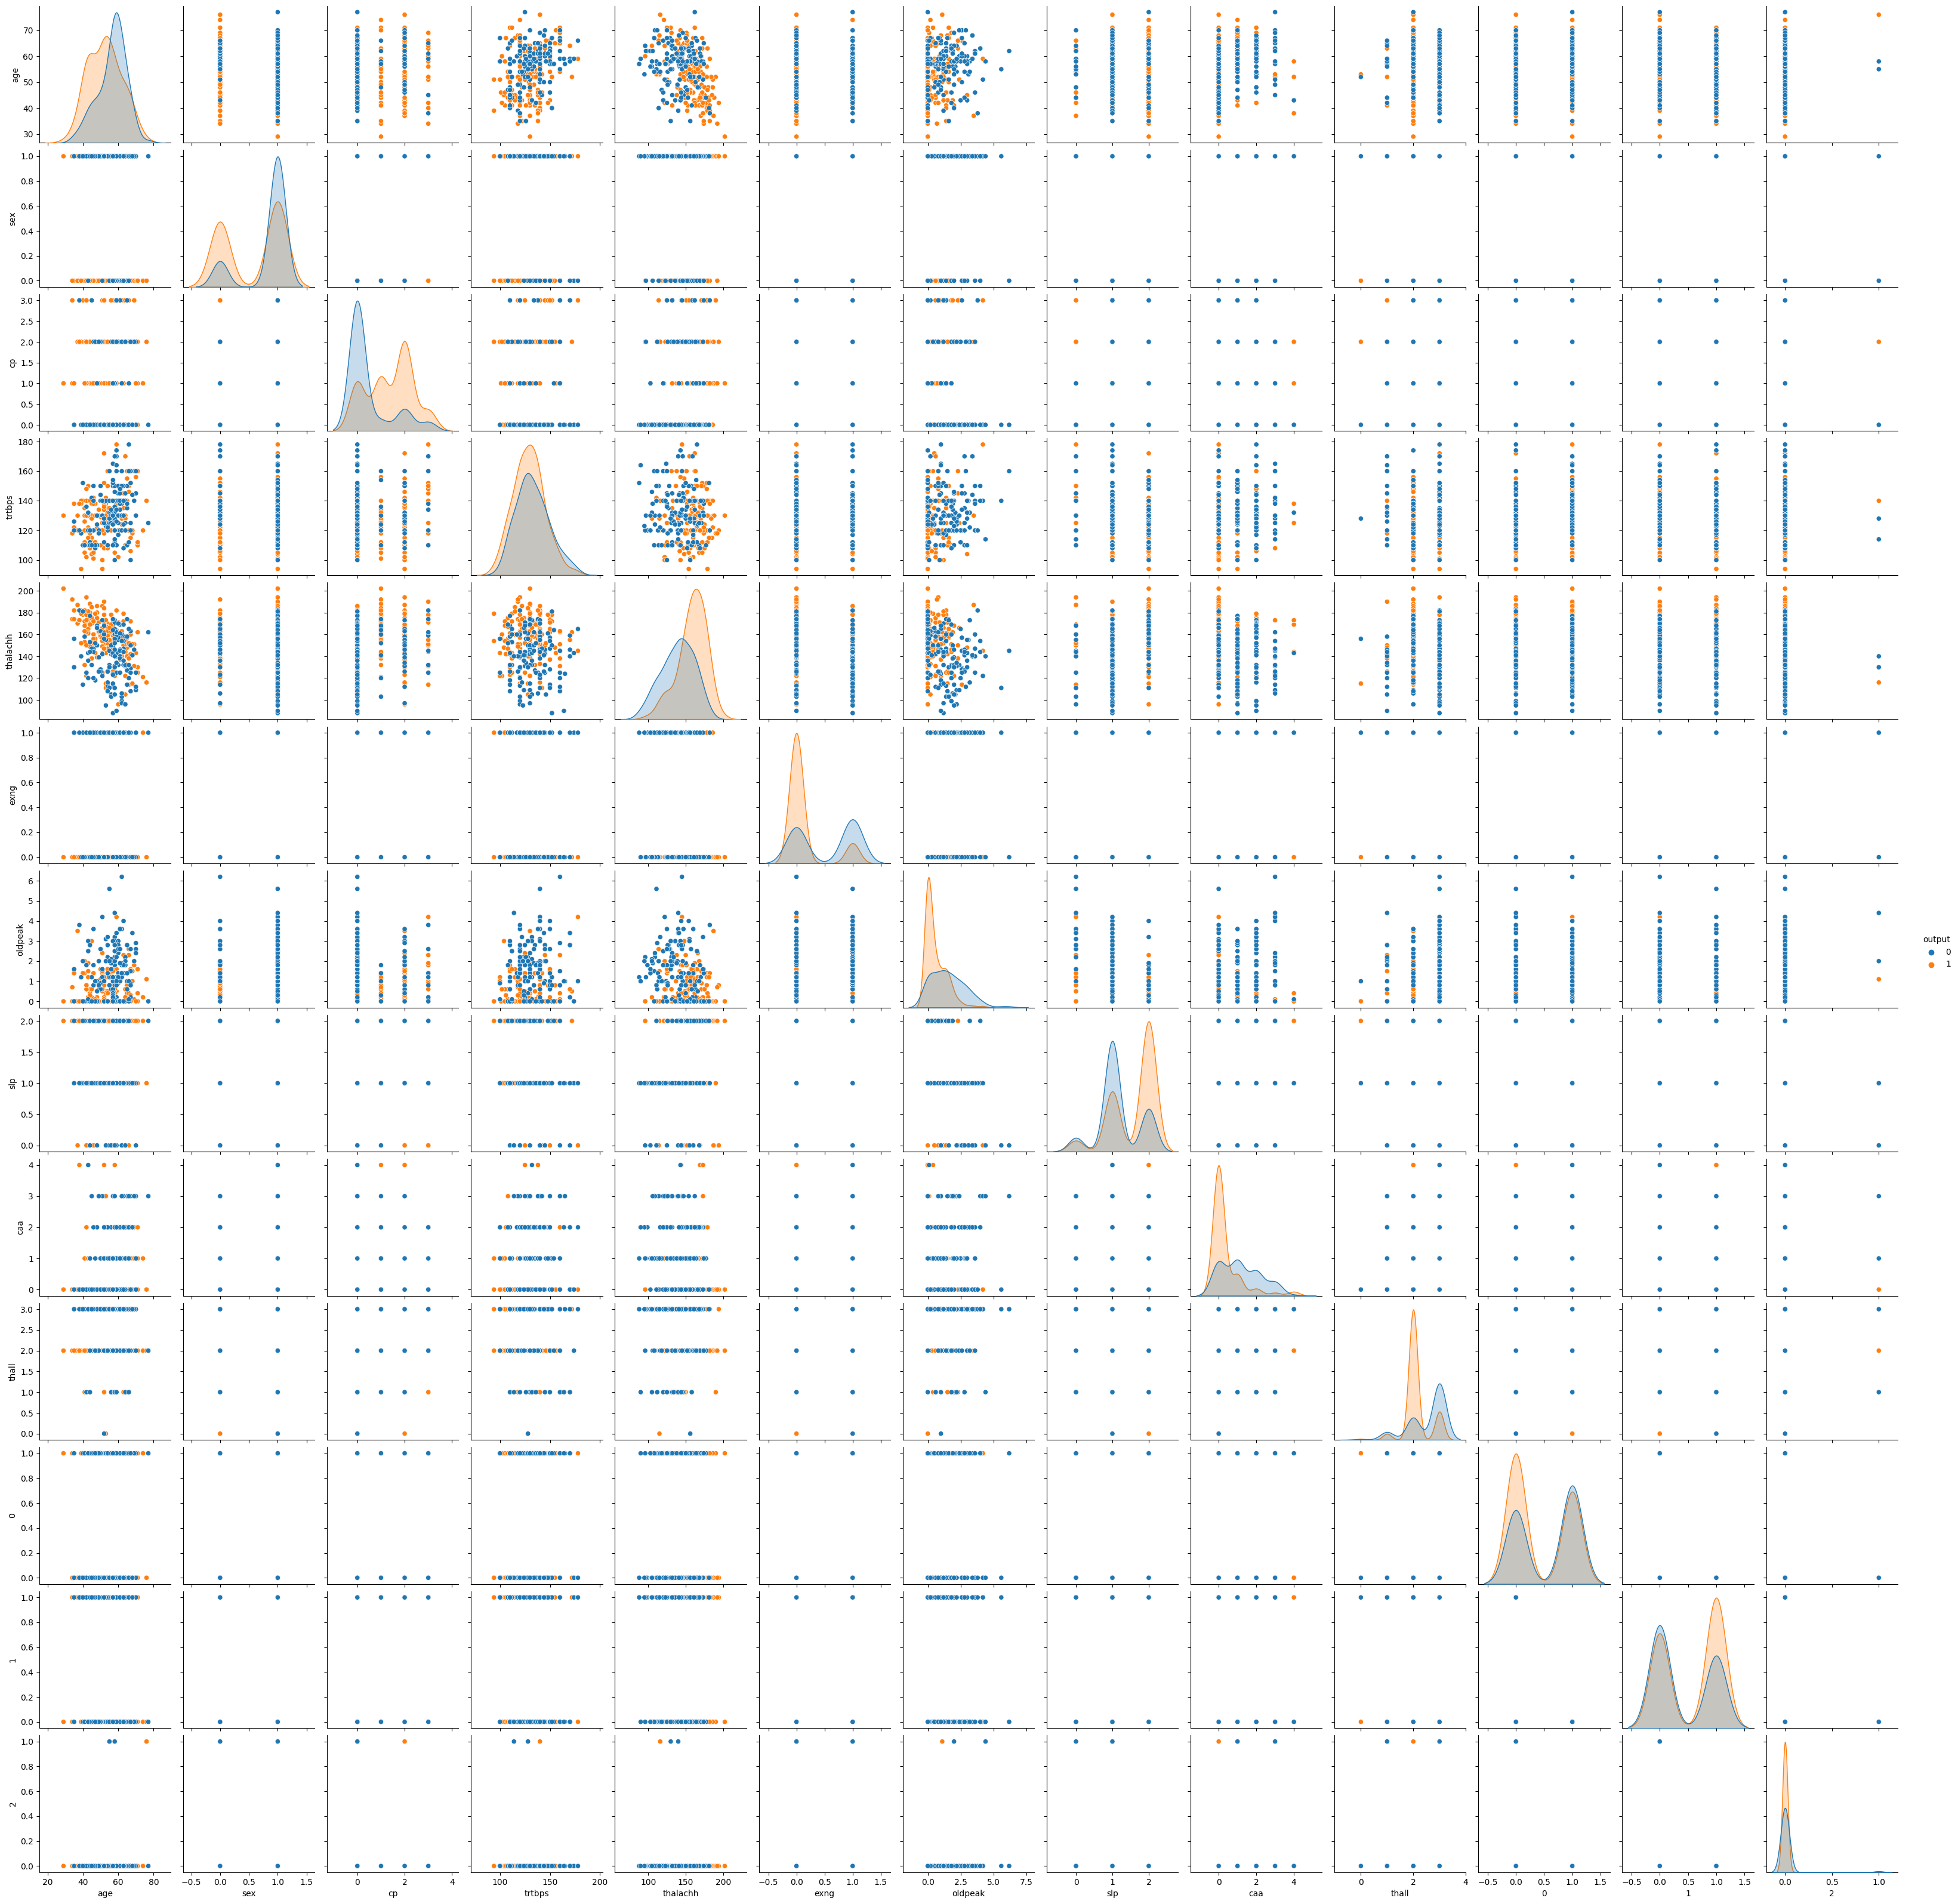

In [ ]:
sns.pairplot(data,hue='output')

In [ ]:
data.columns=data.columns.astype(str)
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak', 'slp',
       'caa', 'thall', 'output', '0', '1', '2'],
      dtype='object')

In [ ]:
Scaler = MinMaxScaler()
data[['age', 'sex', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'output', '0', '1', '2']] = Scaler.fit_transform(data[['age', 'sex', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'output', '0', '1', '2']])

In [ ]:
X=data[['age', 'sex', 'cp', 'trtbps', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'output', '0', '1', '2']].to_numpy()

In [ ]:
y=data[['output']].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [ ]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 32.90it/s]


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.02
LinearDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.02
XGBClassifier,1.00,1.00,1.00,1.00,0.05
SGDClassifier,1.00,1.00,1.00,1.00,0.01
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.01
RidgeClassifier,1.00,1.00,1.00,1.00,0.01
RandomForestClassifier,1.00,1.00,1.00,1.00,0.17
Perceptron,1.00,1.00,1.00,1.00,0.01
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01


In [ ]:
# we choice AdaBoostClassifier for fit model
clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0,random_state=0)
clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_train_hat = clf.predict(X_train)
y_hat = clf.predict(X_test)

In [ ]:
a = accuracy_score(y_train, y_train_hat)
b = accuracy_score(y_test, y_hat)
print(a)
print(b)

1.0
1.0


In [ ]:
print(classification_report(y_train, y_train_hat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00       130

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



<Axes: >

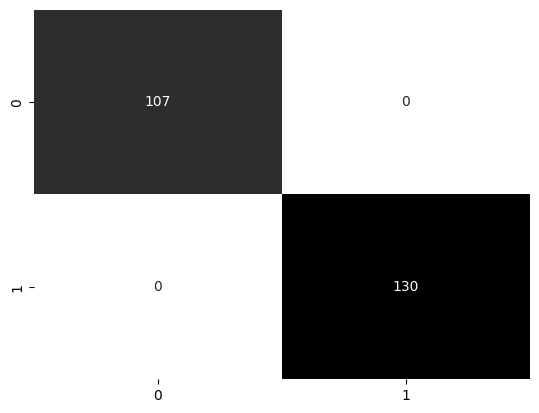

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_hat),cmap='binary',annot=True,fmt='d',cbar=False)

<Axes: >

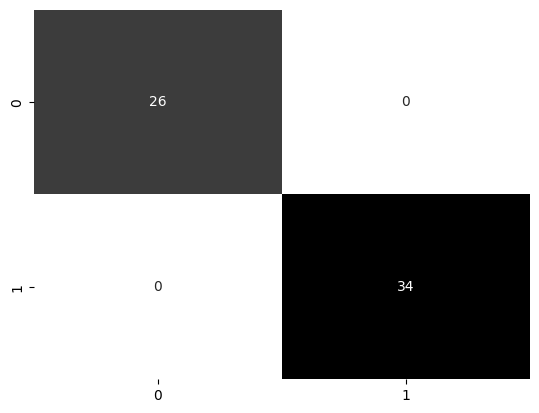

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_hat),cmap='binary',annot=True,fmt='d',cbar=False)

In [ ]:
clf2=AdaBoostClassifier(n_estimators=100, learning_rate=1.0,random_state=0)

In [ ]:
scores = cross_validate(clf2, X, y, cv=5,
                       scoring=('accuracy', 'precision', 'recall', 'f1'),
                        return_train_score=True)
result=pd.DataFrame(scores)

In [ ]:
result